In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [93]:
# Read in data processed in OpenRefine  
FILENAME = "raw-roast-reviews-openrefine.csv"
FILEPATH = os.path.join("data", FILENAME)
df_raw = pd.read_csv(FILEPATH)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   roaster_location                                  7556 non-null   object 
 1   country                                           7553 non-null   object 
 2   coordinate location                               7726 non-null   object 
 3   located in the administrative territorial entity  8099 non-null   object 
 4   roaster_location_identifier                       7555 non-null   object 
 5   coffee_origin                                     7061 non-null   object 
 6   origin_country_cluster                            7628 non-null   object 
 7   roast_level                                       7167 non-null   object 
 8   agtron                                            7560 non-null   object 
 9   est_price          

In [92]:
def tweak_df(df):
    return (df
            .dropna(subset=['origin_country', 'roaster_location'])
            .assign(origin_country=lambda df_: df_['origin_country_cluster'].str.split(',').str[-1].str.strip(),
                    origin_region=lambda df_: df_['origin_country_cluster'].str.split(',').str[:-1].str.join(',').str.strip()
            )
    )

df = tweak_df(df_raw)
df.info()

KeyError: ['origin_country']

In [60]:
df.blind_assessment.sample()

767    Fruit-forward, crisply tropical. Strawberry gu...
Name: blind_assessment, dtype: object

<Axes: title={'center': 'Number of Reviews by Year for Taiwan'}, xlabel='review_date'>

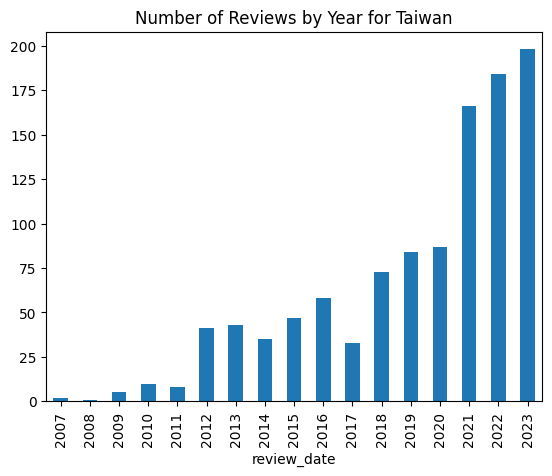

In [73]:

df = df.assign(review_date = pd.to_datetime(df['review_date'], format='%B %Y'))


df[df['country'] == 'Taiwan'].groupby(df['review_date'].dt.year)['review_date'].count().plot(kind='bar', title='Number of Reviews by Year for Taiwan')

<Axes: title={'center': 'Prop of Reviews by Year for Taiwan'}, xlabel='review_date'>

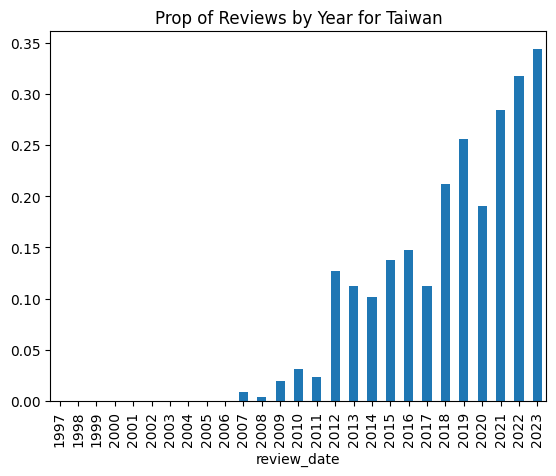

In [80]:
(df[df['country'] == 'Taiwan'].groupby(df['review_date'].dt.year)['review_date'].count()/df.groupby(df['review_date'].dt.year)['review_date'].count()).plot(kind='bar', title='Prop of Reviews by Year for Taiwan')

In [82]:
df[df.review_date.dt.year == 2023].country.value_counts()

country
United States of America      339
Taiwan                        198
Guatemala                      17
People's Republic of China      7
Japan                           4
South Korea                     3
Thailand                        3
United Kingdom                  2
Canada                          1
United Arab Emirates            1
Mexico                          1
Name: count, dtype: int64

In [83]:
df.origin_country.value_counts()

origin_country
multiple                            1292
Ethiopia                            1270
Colombia                             635
Kenya                                596
Guatemala                            439
Indonesia                            370
Panama                               310
Costa Rica                           294
Hawaii                               253
El Salvador                          210
Brazil                               171
Rwanda                               146
Nicaragua                            116
Peru                                 106
Honduras                             106
Mexico                                86
Burundi                               78
Papua New Guinea                      75
Ecuador                               62
Thailand                              59
Tanzania                              52
Bolivia                               49
Yemen                                 46
Democratic Republic of the Congo      35
T